In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio
import pickle
from sklearn.utils import resample


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.feature_selection import RFE

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [37]:
warnings.filterwarnings('ignore')


In [38]:

sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"

In [39]:
def explore_data(df):
    print("Number of Instances and Attributes:", df.shape)
    print('\n')
    print('Dataset columns:',df.columns)
    print('\n')
    print('Data types of each columns: ', df.info())

In [40]:
def checking_removing_duplicates(df):
    count_dups = df.duplicated().sum()
    print("Number of Duplicates: ", count_dups)
    if count_dups >= 1:
        df.drop_duplicates(inplace=True)
        print('Duplicate values removed!')
    else:
        print('No Duplicate values')

In [41]:
def read_in_and_split_data(data, target):
    if target not in data.columns:
        raise ValueError("Target variable not found in DataFrame.")
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [42]:
def GetModel():
    Models = []
    Models.append(('LR'   , LogisticRegression()))
    Models.append(('LDA'  , LinearDiscriminantAnalysis()))
    Models.append(('KNN'  , KNeighborsClassifier()))
    Models.append(('CART' , DecisionTreeClassifier()))
    Models.append(('NB'   , GaussianNB()))
    Models.append(('SVM'  , SVC(probability=True)))
    return Models


In [43]:
def ensemblemodels():
    ensembles = []
    ensembles.append(('AB'   , AdaBoostClassifier()))
    ensembles.append(('GBM'  , GradientBoostingClassifier()))
    ensembles.append(('RF'   , RandomForestClassifier()))
    ensembles.append(( 'Bagging' , BaggingClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    return ensembles


In [44]:
def NormalizedModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))

    return pipelines


In [45]:
def fit_model(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

        print(msg)
        
    return names, results


In [46]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))


In [47]:
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))
    

In [48]:
df = pd.read_csv('SmartCrop-Dataset.csv')

In [49]:
target ='label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)

Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.3%


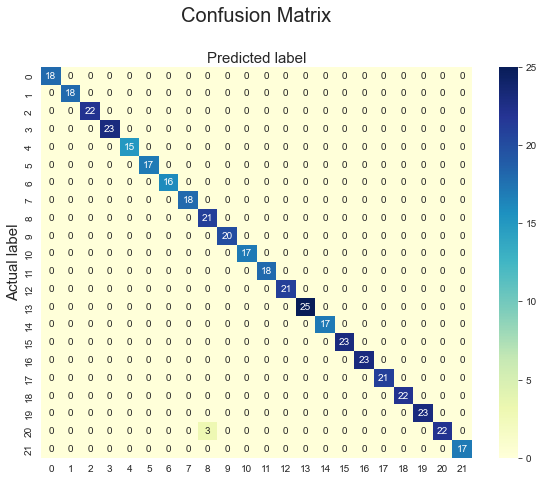

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [50]:
pipeline = make_pipeline(StandardScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)


In [51]:
save_model(model, 'model.pkl')

In [53]:
import streamlit as st 
import pandas as pd
import numpy as np
import os
import pickle
import warnings

warnings.filterwarnings("ignore", message="Trying to unpickle estimator")

def load_model(modelfile):
    loaded_model = pickle.load(open(modelfile, 'rb'))
    return loaded_model

def main():
    # title
    page_bg_img = '''
    <div>
    <h1 style="color:MEDIUMSEAGREEN;text-align:center;"> AgriFinder: Intelligent Crop Recommendation 🌱 </h1>
    </div>
    <style>
    body {
   background-image: url("C:/Users/hp/Desktop/cropwall.jpg");

    background-size: cover;
    }
    </style>
    '''

    st.markdown(page_bg_img, unsafe_allow_html=True)

    col = st.columns(1)[0]

    with col:
        st.subheader(" Find out the most suitable crop to grow in your farm 👨‍🌾")
        N = st.number_input("Nitrogen [KG/HA]", 1,10000)
        P = st.number_input("Phosporus [KG/HA]", 1,10000)
        K = st.number_input("Potassium [KG/HA]", 1,10000)
        temp = st.number_input("Temperature [C]",0.0,100000.0)
        humidity = st.number_input("Humidity in %", 0.0,100000.0)
        ph = st.number_input("Ph", 0.0,100000.0)
        rainfall = st.number_input("Rainfall in mm",0.0,100000.0)
        state_list = ["Andhra Pradesh", "Assam", "Bihar", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu and Kashmir", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Pondicherry", "Tamil Nadu", "Telangana", "Tripura", "Uttarakhand", "West Bengal", "Andaman and Nicobar", "Chattisgarh"]
        state_name = st.selectbox("State",state_list)
        soil_list=["Sandy soil","Red soil","Laterite soil"," Desert soil"," Clayey soil","Sandy loam","Alluvial soil","Sandy Clay loam","Black soil","Regular soil","Inceptisols","Loamy soil","Delta alluvium","Mountain soil."]
        soilType=st.selectbox("SoilType",soil_list)
        feature_list = [N, P, K, temp, humidity, ph, rainfall]
        single_pred = np.array(feature_list).reshape(1,-1)
        
        if st.button('Predict'):

            loaded_model = load_model('model.pkl')
            prediction = loaded_model.predict(single_pred)
            col.write('''
            ## Results 🔍 
            ''')
            col.success(f"{prediction.item().title()} are recommended by the A.I for your farm.")
    
    hide_menu_style = """
    <style>
    .block-container {padding: 2rem 1rem 3rem;}
    #MainMenu {visibility: hidden;}
    </style>
    """

    st.markdown(hide_menu_style, unsafe_allow_html=True)

if __name__ == '__main__':
    main()
